 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whaledf=pd.read_csv("Resources/whale_returns.csv")
whaledf

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [6]:
# Count nulls
whaledf.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whaledf = whaledf.dropna()
whaledf['Date']=pd.to_datetime(whaledf['Date'])
whaledf

C:\Users\reeve\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [8]:
whaledf=whaledf.set_index("Date")

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algodf=pd.read_csv("../Starter_Code/Resources/algo_returns.csv")
algodf

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [10]:
# Count nulls
algodf.isnull().sum()
# algodf

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algodf = algodf.dropna()
algodf['Date']=pd.to_datetime(algodf['Date'])
algodf

C:\Users\reeve\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [12]:
algodf=algodf.set_index("Date")

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp500df = pd.read_csv("Resources/sp500_history.csv")
sp500df

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [14]:
# Check Data Types
sp500df.dtypes

Date     object
Close    object
dtype: object

In [15]:
# Fix Data Types
sp500df['Close']=pd.to_numeric(sp500df['Close'].str.replace('$', ''))
sp500df['Date']=pd.to_datetime(sp500df['Date'])
sp500df.dtypes
# sp500df['Closed']=pd.to_numeric(sp500df['Close'])

Date     datetime64[ns]
Close           float64
dtype: object

In [16]:
# Calculate Daily Returns
# shift or pct_pct

sp500df['daily_returns'] = (sp500df['Close']/ sp500df['Close'].shift(-1)) -1



In [17]:
# Drop nulls
sp500df.dropna(inplace = True)

In [18]:
# Rename `Close` Column to be specific to this portfolio.
# .rename()
sp500df.rename(columns = {'Close': 'Daily Close'})


,Date,Daily Close,daily_returns
0,2019-04-23,2933.68,0.008841
1,2019-04-22,2907.97,0.001012
2,2019-04-18,2905.03,0.001579
3,2019-04-17,2900.45,-0.002274
4,2019-04-16,2907.06,0.000509
...,...,...,...
1643,2012-10-08,1455.88,-0.003457
1644,2012-10-05,1460.93,-0.000322
1645,2012-10-04,1461.40,0.007174
1646,2012-10-03,1450.99,0.003624


In [19]:
sp500df=sp500df.set_index("Date")

## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# merge
#whaledf.drop(columns=["Date"])
#whaledf.head()
combineddf=whaledf.merge(algodf, left_index=True, right_index=True).merge(sp500df['daily_returns'], left_index=True, right_index=True)
             # suffixes=('_left', '_right'))

combineddf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Whale Daily Returns'}, xlabel='Date'>

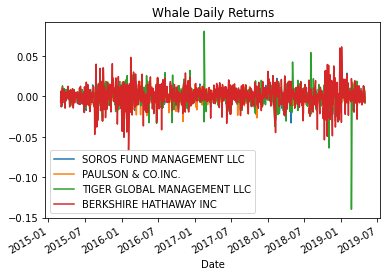

In [21]:
whaledf.plot(title='Whale Daily Returns')
#whaledf.set_index('Date').plot(title='Whale Daily Returns')

<AxesSubplot:title={'center':'algo daily returns'}, xlabel='Date'>

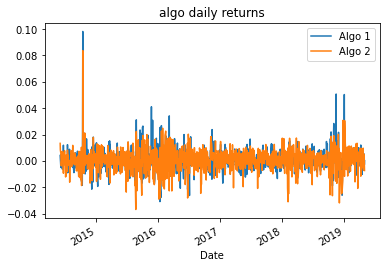

In [22]:
algodf.plot(title='algo daily returns')

<AxesSubplot:title={'center':'S&P daily close'}, xlabel='Date'>

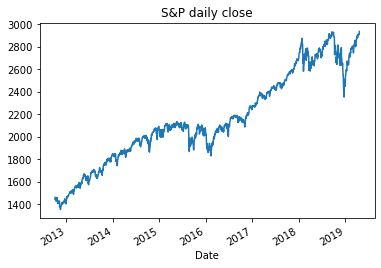

In [23]:
sp500df['Close'].plot(title='S&P daily close')

<AxesSubplot:title={'center':'S&P daily returns'}, xlabel='Date'>

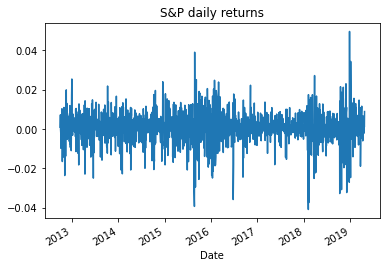

In [24]:
sp500df['daily_returns'].plot(title='S&P daily returns')

#### Calculate and Plot cumulative returns.

In [25]:
whaledf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


<AxesSubplot:xlabel='Date'>

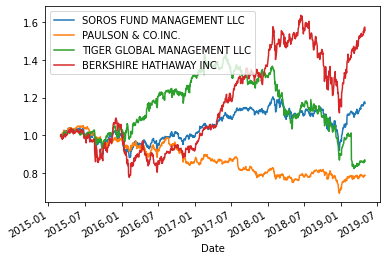

In [26]:
(whaledf+1).cumprod().plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

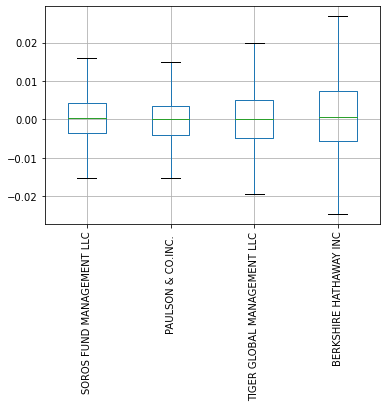

In [27]:
# Box plot to visually show risk
# whaledf = pd.DataFrame(np.random.randn(10, 4),
#                       columns=['Col1', 'Col2', 'Col3', 'Col4'])
whaledf.boxplot(showfliers=False, rot=90)

<AxesSubplot:>

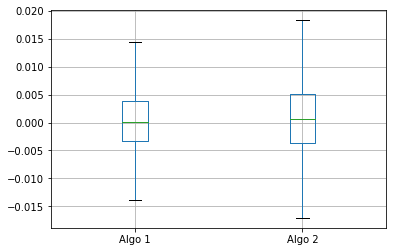

In [28]:
algodf.boxplot(showfliers=False)

<AxesSubplot:>

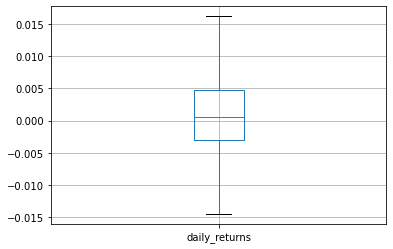

In [29]:
sp500df[['daily_returns']].boxplot(showfliers=False)

<AxesSubplot:>

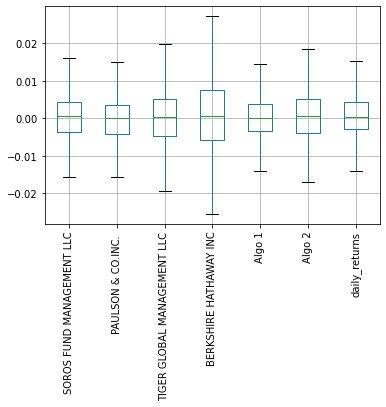

In [30]:
combineddf.boxplot(showfliers=False, rot=90)

### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios
whaledf.std()


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [32]:
algodf.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [33]:
sp500df.std()

Close            401.863422
daily_returns      0.008111
dtype: float64

In [34]:
combineddf.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
daily_returns                  0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [35]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500

combineddf.std()>sp500df['daily_returns'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
daily_returns                   True
dtype: bool

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized standard deviation (252 trading days)
combineddf.std()/np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.000497
PAULSON & CO.INC.              0.000442
TIGER GLOBAL MANAGEMENT LLC    0.000686
BERKSHIRE HATHAWAY INC         0.000814
Algo 1                         0.000480
Algo 2                         0.000526
daily_returns                  0.000539
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

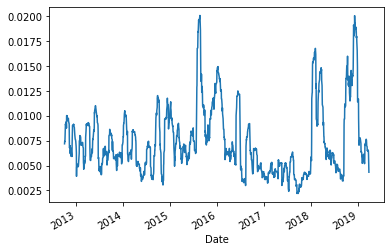

In [37]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# .rolling
# Plot the rolling standard deviation

sp500df['daily_returns'].rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

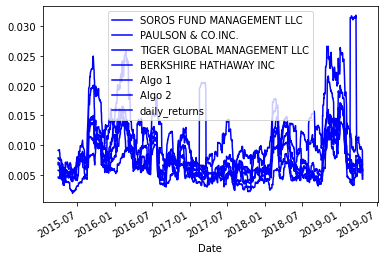

In [38]:
combineddf.rolling(window=21).std().plot(style='b')

### Calculate and plot the correlation

In [39]:
combineddf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:>

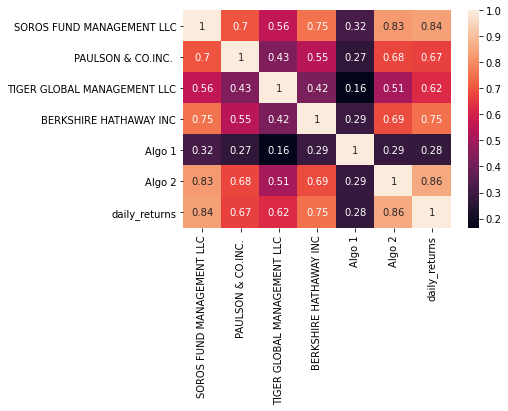

In [40]:
# Calculate the correlation
# daily_returns = sp500df.pct_change()
#sp500df.corr
#close_correlation = sp500df.corr()
correlation = combineddf.corr()
correlation
# Display the correlation matrix
# sp500df[:10]

sb.heatmap(correlation, annot=True)
# correlation.style.background_gradient(cmap='summer')

#(sp500df).corr().plot()

#sp500df['daily_returns'] = (sp500df['Close']/ sp500df['Close'].shift(-1)) -1

#sp500df['correlation'].rolling(window=7).corr().plot()

#data = sp500df.corr()
#sp500df = pd.DataFrame('data', columns=['date','daily_returns'])

#sp500df.plot(x='Close Date', y='daily_returns', kind = 'bar')

#plt.matshow(sp500df.corr())
#plt.show()
#sp500df['daily_returns'].rolling(window=14).corr().plot()
#close_correlation.plot(kind='scatter', x="date" , y="close")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

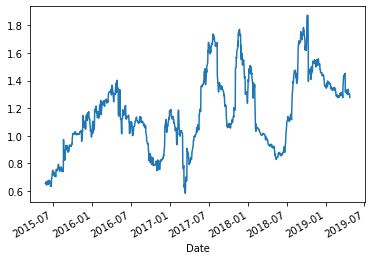

In [41]:
# Calculate covariance of a single portfolio

# daily_returns = combineddf.pct_change()
# daily_returns

covariance = combineddf['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combineddf['daily_returns'])

# Calculate variance of S&P 500

#variance = daily_returns.var()
variance=combineddf['daily_returns'].rolling(window=60).var()

# Computing beta
beta=covariance/variance

# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [42]:
# Use `ewm` to calculate the rolling window

combineddf.ewm(com=21).mean()

#times = []
#combineddf.ewm(halflife='21 days', times=pd.DatatimeIndex(times).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000523,-0.000774,-0.001538,-0.001052,-0.005343,0.000773,-0.004462
2015-03-05,0.001742,0.000918,-0.000180,0.001662,-0.003812,0.002012,-0.002487
2015-03-06,-0.000841,-0.000284,-0.002402,-0.002289,-0.004118,-0.001595,-0.005616
2015-03-09,-0.000529,0.000704,-0.000596,-0.002150,-0.004409,-0.000960,-0.003522
...,...,...,...,...,...,...,...
2019-04-16,0.001651,0.000494,-0.000383,0.001805,0.000678,0.001431,0.001480
2019-04-17,0.001444,0.000177,-0.000566,0.001869,0.000179,0.001128,0.001309
2019-04-18,0.001444,0.000225,-0.000514,0.001872,0.000144,0.001021,0.001321


# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios
sharpe_ratios = (combineddf.mean() * 252) / (combineddf.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
daily_returns                  0.648267
dtype: float64

<AxesSubplot:>

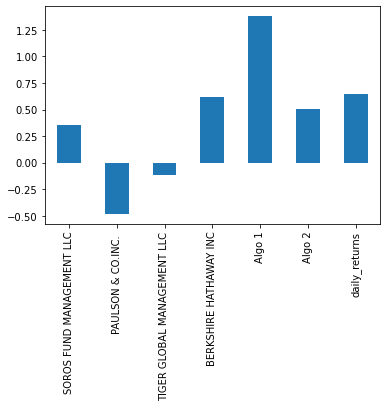

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(rot=90)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [49]:
# Reading data from 1st stock
googdf=pd.read_csv("Resources/goog_historical.csv", index_col="Trade DATE")

In [50]:
# Reading data from 2nd stock
aapldf=pd.read_csv("Resources/aapl_historical.csv", index_col="Trade DATE")

In [51]:
# Reading data from 3rd stock
costdf=pd.read_csv("Resources/cost_historical.csv", index_col="Trade DATE")

In [52]:
# Combine all stocks in a single DataFrame
combinedstockdf=googdf.merge(aapldf, left_index=True, right_index=True).merge(costdf, left_index=True, right_index=True)
#pd.merg(pd.merge(googdf,appldf),costdf)
combinedstockdf

,Symbol_x,NOCP_x,Symbol_y,NOCP_y,Symbol,NOCP
Trade DATE,,,,,,
5/9/2019,GOOG,1162.38,AAPL,200.72,COST,243.47
5/8/2019,GOOG,1166.27,AAPL,202.90,COST,241.34
5/7/2019,GOOG,1174.10,AAPL,202.86,COST,240.18
5/6/2019,GOOG,1189.39,AAPL,208.48,COST,244.23
5/3/2019,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
5/17/2018,GOOG,1078.59,AAPL,186.99,COST,199.60
5/16/2018,GOOG,1081.77,AAPL,188.18,COST,198.71
5/15/2018,GOOG,1079.23,AAPL,186.44,COST,195.48


In [59]:
# Reset Date index
# combinedstockdf=combinedstockdf.reset_index(drop=True)
combinedstockdf.index=pd.to_datetime(combinedstockdf.index)
combinedstockdf

,Symbol_x,NOCP_x,Symbol_y,NOCP_y,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48


In [60]:
combinedstockdf.dtypes

Symbol_x     object
NOCP_x      float64
Symbol_y     object
NOCP_y      float64
Symbol       object
NOCP        float64
dtype: object

In [68]:
# Reorganize portfolio data by having a column per symbol
# combinedstockdf.drop(columns=['Symbol_x', 'Symbol_y', 'Symbol'], inplace=True)
combinedstockdf.columns=['GOOG', 'AAPL', 'COST']
combinedstockdf.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [83]:
# Calculate daily returns
returns=combinedstockdf.pct_change(-1)
returns.head()
# Drop NAs
#combinedstockdf.isnull().sum()
returns = returns.dropna()
#combinedstockdf
# Display sample data
returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,-0.003335,-0.010744,0.008826
2019-05-08,-0.006669,0.000197,0.004830
2019-05-07,-0.012855,-0.026957,-0.016583
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-03,0.019602,0.012431,0.007953


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [84]:
# Set weights
weights = [1/3, 1/3, 1/3]
weighted_returns = returns*weights
# weighted_returns
# Calculate portfolio return
# weighted_returns.sum(axis=1)
# Display sample data
portfolio_returns=weighted_returns.sum(axis=1)
# portfolio_returns=returns.dot(weights)
portfolio_returns.tail()

Trade DATE
2018-05-18   -0.006061
2018-05-17   -0.001595
2018-05-16    0.009403
2018-05-15   -0.010064
2018-05-14    0.000015
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [86]:
# Join your returns DataFrame to the original returns DataFrame
combineddf['Custom']=portfolio_returns
combineddf.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returns,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [87]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios=combineddf.dropna()
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returns,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [92]:
# Calculate the annualized `std`
all_portfolios.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
daily_returns                  0.152054
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

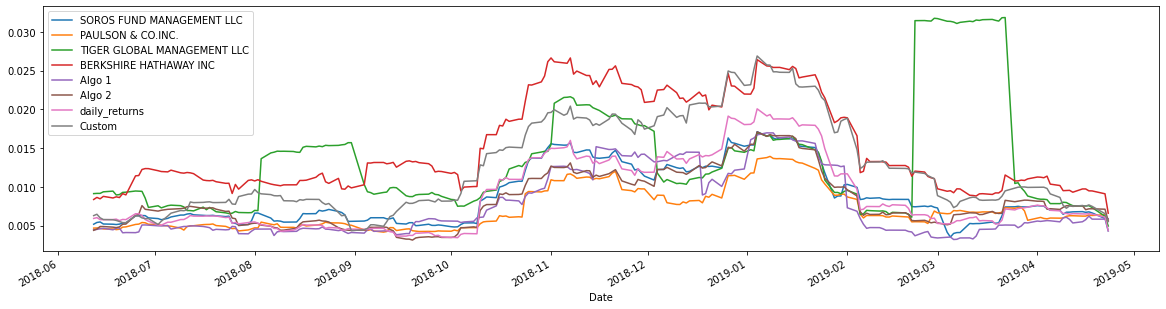

In [90]:
# Calculate rolling standard deviation
all_portfolios.rolling(window=21).std().plot(figsize=(20, 5))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

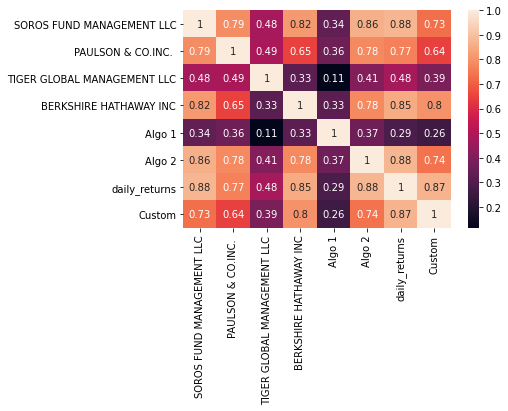

In [94]:
# Calculate and plot the correlation
correlation_all = all_portfolios.corr()
correlation_all

sb.heatmap(correlation_all, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Trade DATE'>

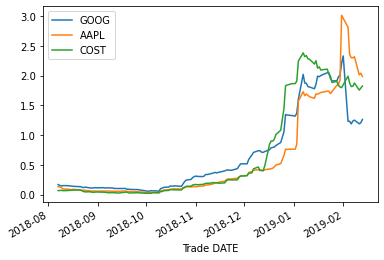

In [117]:
covariance = returns.rolling(window=60).cov(combineddf['daily_returns'])

# Check the dataframe above
# Calculate variance of S&P 500
variance = returns.rolling(window=60).var()
#variance = daily_returns.var()
#variance=combineddf['daily_returns'].rolling(window=60).var()

# Computing beta
beta=covariance/variance

# Plot beta trend
beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [119]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_port = (returns.mean() * 252) / (returns.std() * np.sqrt(252))
sharpe_ratios_port

GOOG    0.349657
AAPL    0.361306
COST    1.160482
dtype: float64

<AxesSubplot:>

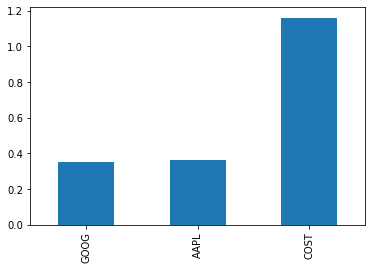

In [120]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_port.plot.bar(rot=90)

### How does your portfolio do?

Write your answer here!

According to the Sharpe Ratios, my best risk/return is COST, with GOOG and APPL being higher risk.